In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from preprocess.PreProcess import ASAP_PreProcess, TA_PreProcess, GS_PreProcess
from models import ABAE, JPAN, CNN_Gate_Aspect_Text
from capsnet import RecurrentCapsuleNetwork, CapsuleLoss
from trainer import ACSA_supervised_model_trainer
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_name = 'GS' # ['ASAP', 'TA']
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
seed = 1
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True

In [3]:
if data_name == 'ASAP':
    asap = ASAP_PreProcess(duplicate=True)
    w2v_model, train_set, dev_set, test_set = asap.get_dataset(duplicate=True)
elif data_name == 'TA':
    ta = TA_PreProcess(duplicate=True)
    w2v_model, train_set, dev_set, test_set = ta.get_dataset(duplicate=True)
elif data_name == 'GS':
    gs = GS_PreProcess(duplicate=True)
    w2v_model, train_set, dev_set, test_set = gs.get_dataset(duplicate=True)

N_vocab: 11359 | D_embed: 200 | N_aspects: 20


### Train

In [4]:
# n_vocab, d_embed = w2v_model.E.shape
# embedding = nn.Embedding(n_vocab, d_embed)
# embedding.weight = nn.Parameter(torch.from_numpy(w2v_model.E), requires_grad=False)
# aspect_embedding = nn.Embedding(w2v_model.T.shape[0], embedding_dim=200)
# aspect_embedding.weight = nn.Parameter(torch.from_numpy(w2v_model.T), requires_grad=True)

# model = RecurrentCapsuleNetwork(
#     embedding=embedding,
#     aspect_embedding=aspect_embedding,
#     num_layers=2,
#     bidirectional=True,
#     capsule_size=300, # maybe 200
#     dropout=0.5,
#     num_categories=3
# ).to(device)
# model

RecurrentCapsuleNetwork(
  (embedding): Embedding(11359, 200)
  (aspect_embedding): Embedding(20, 200)
  (aspect_transform): Sequential(
    (0): Linear(in_features=200, out_features=300, bias=True)
    (1): Dropout(p=0.5, inplace=False)
  )
  (sentence_transform): Sequential(
    (0): Linear(in_features=400, out_features=300, bias=True)
    (1): Dropout(p=0.5, inplace=False)
  )
  (norm_attention): BilinearAttention()
  (capsule_projection): Linear(in_features=300, out_features=900, bias=True)
  (rnn): GRU(400, 200, num_layers=2, batch_first=True, bidirectional=True)
)

In [4]:
model = CNN_Gate_Aspect_Text(w2v_model.E, w2v_model.T).to(device)
model

CNN_Gate_Aspect_Text(
  (embed): Embedding(11359, 200)
  (aspect_embed): Embedding(20, 200)
  (convs1): ModuleList(
    (0): Conv1d(200, 100, kernel_size=(3,), stride=(1,))
    (1): Conv1d(200, 100, kernel_size=(4,), stride=(1,))
    (2): Conv1d(200, 100, kernel_size=(5,), stride=(1,))
  )
  (convs2): ModuleList(
    (0): Conv1d(200, 100, kernel_size=(3,), stride=(1,))
    (1): Conv1d(200, 100, kernel_size=(4,), stride=(1,))
    (2): Conv1d(200, 100, kernel_size=(5,), stride=(1,))
  )
  (fc1): Linear(in_features=300, out_features=3, bias=True)
  (fc_aspect): Linear(in_features=200, out_features=100, bias=True)
)

Training

In [5]:
epochs = 20
batch_size = 128
trainer = ACSA_supervised_model_trainer(data_name=data_name)

TRAIN EPOCH: 1 | TRAIN-LOSS: 0.43937 | TRAIN-ACC: 0.84375: 100%|███████████████████| 1351/1351 [00:40<00:00, 33.19it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 189.27it/s]


VAL-ACC: 0.86110


TRAIN EPOCH: 2 | TRAIN-LOSS: 0.19801 | TRAIN-ACC: 0.96094: 100%|███████████████████| 1351/1351 [00:38<00:00, 34.89it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 188.84it/s]


VAL-ACC: 0.86291


TRAIN EPOCH: 3 | TRAIN-LOSS: 0.45469 | TRAIN-ACC: 0.84375: 100%|███████████████████| 1351/1351 [00:38<00:00, 35.00it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 182.70it/s]


VAL-ACC: 0.86323


TRAIN EPOCH: 4 | TRAIN-LOSS: 0.37563 | TRAIN-ACC: 0.87500: 100%|███████████████████| 1351/1351 [00:38<00:00, 35.37it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 185.31it/s]


VAL-ACC: 0.86389


TRAIN EPOCH: 5 | TRAIN-LOSS: 0.33365 | TRAIN-ACC: 0.89844: 100%|███████████████████| 1351/1351 [00:38<00:00, 35.32it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 185.72it/s]


VAL-ACC: 0.86482


TRAIN EPOCH: 6 | TRAIN-LOSS: 0.38120 | TRAIN-ACC: 0.86719: 100%|███████████████████| 1351/1351 [00:38<00:00, 35.35it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 183.70it/s]


VAL-ACC: 0.86491


TRAIN EPOCH: 7 | TRAIN-LOSS: 0.31678 | TRAIN-ACC: 0.90625: 100%|███████████████████| 1351/1351 [00:38<00:00, 35.17it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 185.72it/s]


VAL-ACC: 0.86505


TRAIN EPOCH: 8 | TRAIN-LOSS: 0.33571 | TRAIN-ACC: 0.89844: 100%|███████████████████| 1351/1351 [00:38<00:00, 34.79it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 186.13it/s]


VAL-ACC: 0.86514


TRAIN EPOCH: 9 | TRAIN-LOSS: 0.26788 | TRAIN-ACC: 0.94531: 100%|███████████████████| 1351/1351 [00:38<00:00, 34.75it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 183.30it/s]


VAL-ACC: 0.86519


TRAIN EPOCH: 10 | TRAIN-LOSS: 0.36247 | TRAIN-ACC: 0.89844: 100%|██████████████████| 1351/1351 [00:38<00:00, 34.72it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 185.93it/s]


VAL-ACC: 0.86500


TRAIN EPOCH: 11 | TRAIN-LOSS: 0.31967 | TRAIN-ACC: 0.90625: 100%|██████████████████| 1351/1351 [00:38<00:00, 34.79it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 185.52it/s]


VAL-ACC: 0.86533


TRAIN EPOCH: 12 | TRAIN-LOSS: 0.40076 | TRAIN-ACC: 0.84375: 100%|██████████████████| 1351/1351 [00:38<00:00, 34.76it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 184.70it/s]


VAL-ACC: 0.86547


TRAIN EPOCH: 13 | TRAIN-LOSS: 0.38776 | TRAIN-ACC: 0.87500: 100%|██████████████████| 1351/1351 [00:38<00:00, 34.78it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 186.13it/s]


VAL-ACC: 0.86542


TRAIN EPOCH: 14 | TRAIN-LOSS: 0.37665 | TRAIN-ACC: 0.84375: 100%|██████████████████| 1351/1351 [00:38<00:00, 34.77it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 186.34it/s]


VAL-ACC: 0.86547


TRAIN EPOCH: 15 | TRAIN-LOSS: 0.25562 | TRAIN-ACC: 0.92188: 100%|██████████████████| 1351/1351 [00:38<00:00, 34.80it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 186.34it/s]


VAL-ACC: 0.86565


TRAIN EPOCH: 16 | TRAIN-LOSS: 0.27776 | TRAIN-ACC: 0.86719: 100%|██████████████████| 1351/1351 [00:38<00:00, 34.80it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 185.72it/s]


VAL-ACC: 0.86542


TRAIN EPOCH: 17 | TRAIN-LOSS: 0.51192 | TRAIN-ACC: 0.85156: 100%|██████████████████| 1351/1351 [00:38<00:00, 34.82it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 186.13it/s]


VAL-ACC: 0.86537


TRAIN EPOCH: 18 | TRAIN-LOSS: 0.28218 | TRAIN-ACC: 0.91406: 100%|██████████████████| 1351/1351 [00:38<00:00, 34.80it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 183.70it/s]


VAL-ACC: 0.86556


TRAIN EPOCH: 19 | TRAIN-LOSS: 0.41765 | TRAIN-ACC: 0.87500: 100%|██████████████████| 1351/1351 [00:38<00:00, 34.78it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 186.13it/s]


VAL-ACC: 0.86561


TRAIN EPOCH: 20 | TRAIN-LOSS: 0.30372 | TRAIN-ACC: 0.90625: 100%|██████████████████| 1351/1351 [00:38<00:00, 34.73it/s]
validating: 100%|███████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 186.13it/s]


VAL-ACC: 0.86551


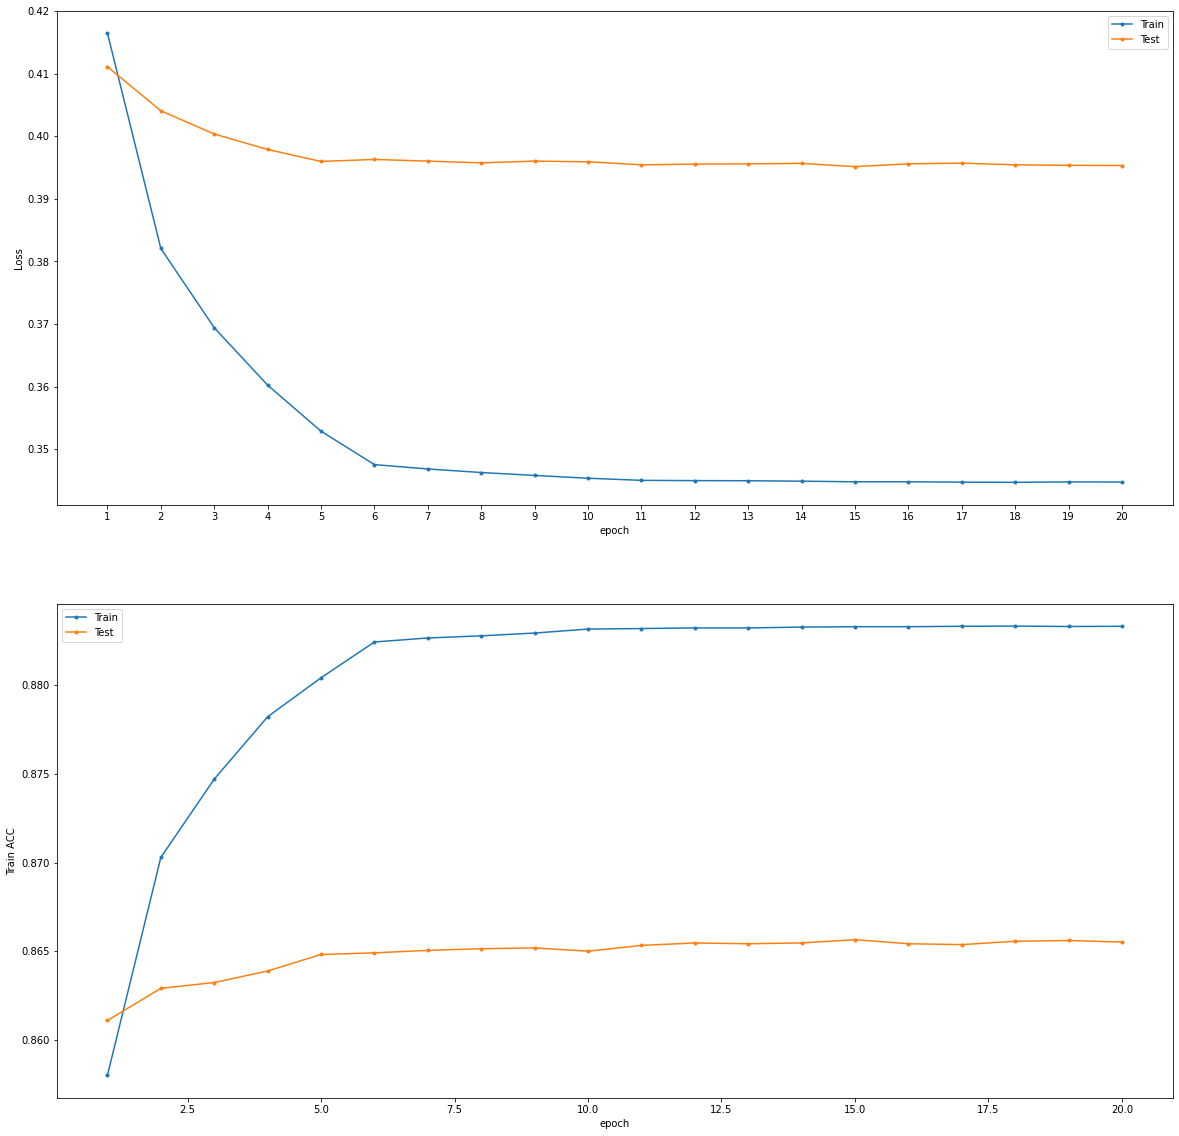

In [6]:
trainer.train(model, train_set, dev_set=dev_set, device=device, epochs=epochs, batch_size=batch_size, 
              data_name=data_name, model_name='GCAE_' + str(seed))

Testing

In [9]:
model = CNN_Gate_Aspect_Text(w2v_model.E, w2v_model.T).to(device)
model.load_state_dict(torch.load("./model_params/"+ data_name +"_GCAE_" + str(seed) + "_15.model"))
model.eval()

CNN_Gate_Aspect_Text(
  (embed): Embedding(11359, 200)
  (aspect_embed): Embedding(20, 200)
  (convs1): ModuleList(
    (0): Conv1d(200, 100, kernel_size=(3,), stride=(1,))
    (1): Conv1d(200, 100, kernel_size=(4,), stride=(1,))
    (2): Conv1d(200, 100, kernel_size=(5,), stride=(1,))
  )
  (convs2): ModuleList(
    (0): Conv1d(200, 100, kernel_size=(3,), stride=(1,))
    (1): Conv1d(200, 100, kernel_size=(4,), stride=(1,))
    (2): Conv1d(200, 100, kernel_size=(5,), stride=(1,))
  )
  (fc1): Linear(in_features=300, out_features=3, bias=True)
  (fc_aspect): Linear(in_features=200, out_features=100, bias=True)
)

In [17]:
# model = RecurrentCapsuleNetwork(
#     embedding=embedding,
#     aspect_embedding=aspect_embedding,
#     num_layers=2,
#     bidirectional=True,
#     capsule_size=300, # maybe 200
#     dropout=0.5,
#     num_categories=3
# ).to(device)
# model.load_state_dict(torch.load("./model_params/"+ data_name +"_CapsNet_"+ str(seed) + "_20.model"))
# model.eval()

RecurrentCapsuleNetwork(
  (embedding): Embedding(11359, 200)
  (aspect_embedding): Embedding(20, 200)
  (aspect_transform): Sequential(
    (0): Linear(in_features=200, out_features=300, bias=True)
    (1): Dropout(p=0.5, inplace=False)
  )
  (sentence_transform): Sequential(
    (0): Linear(in_features=400, out_features=300, bias=True)
    (1): Dropout(p=0.5, inplace=False)
  )
  (norm_attention): BilinearAttention()
  (capsule_projection): Linear(in_features=300, out_features=900, bias=True)
  (rnn): GRU(400, 200, num_layers=2, batch_first=True, bidirectional=True)
)

In [10]:
trainer.test(model, test_set, batch_size, device)

testing: 100%|██████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 191.64it/s]

SC: Accuracy: 0.8674348089751365
